# [Machine Learning] Polynomial Fitting


### Student ID : 20144367, Name : Lee, Donghyun


## 1. Problem

#### [Polynomial fitting]

Solve a least square problem to find an optimal polynomial curve for a given set of two dimensional points.

Demonstrate the effect of the degree of polynomial in fitting a given set of points.

- choose a polynomial curve and generate points along the curve with random noise

- plot the generated noisy points along with its original polynomial without noise

- plot the approximating polynomial curve obtained by solving a least square problem

- plot the approximating polynomial curve with varying polynomial degree


## 2. Codes

#### Libraries

In [219]:
import numpy as np
import matplotlib.pyplot as plt
import random, math

#### Function fx : Generate function with x domain(npArray)

In [220]:
def fx(npArray) :
    y = np.zeros(len(npArray), dtype = float)
    for i in range(len(npArray)) :
        y[i] = np.power(npArray[i],3) - 3 * np.power(npArray[i],2) + 5 * npArray[i] + 14 
    return y

#### Function generateRandomPoints : Generate random points based on f(x) and stddev scalar

In [221]:
def generateRandomPoints(fx, scalar) :
    y = np.zeros(len(fx), dtype = float)
    for i in range(len(fx)) :
        y[i] = fx[i] + random.gauss(0.0,scalar)
    return y

#### Function generateFuncEquation : Used for generating function for legend for each approximated graph

In [222]:
def generateFuncEquation(coeff) :
    equation = '$f(x)='
    degree = len(coeff) - 1
    for i in range(degree) :
        equation += str('%0.5f' % coeff[i]) + 'x^' + str(degree - i)
        if(i < degree and coeff[i+1] >= 0) :
            equation += '+'
        else :
            continue
    if coeff[-1] != 0 :
        equation += str('%0.5f' % coeff[-1])
    equation += '$'
    return equation

#### Function L2Distance : L2 distance between two lists

In [223]:
def L2Distance(listX, listY):

    x = np.array(listX)
    y = np.array(listY)

    sqrSumList = (x - y) ** 2    
    sqrSum = np.sum(sqrSumList)  
    result = np.sqrt(sqrSum)     
    return(result)

#### Base Polynomial Curve and Generated Points

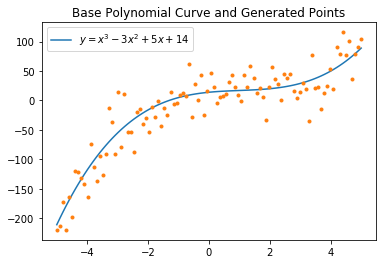

In [227]:
x = np.linspace(-5,5,100) # x domain
y = fx(x) # Generated function based on x domain defined above 
dp = generateRandomPoints(y, 30) # Random data point with noise coefficient

plt.title('Base Polynomial Curve and Generated Points')
plt.plot(x,y,label='$y = x^3 - 3x^2 + 5x + 14$')
plt.legend()
plt.plot(x,dp,'.')
plt.show()

#### Plot polynomial curves for each order from 1 ~ 10

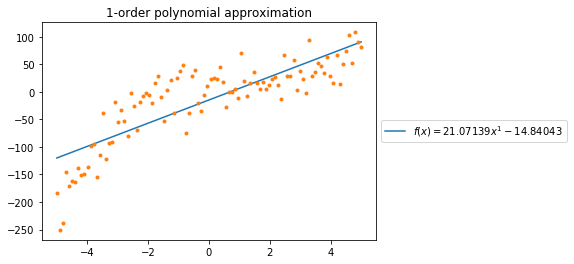

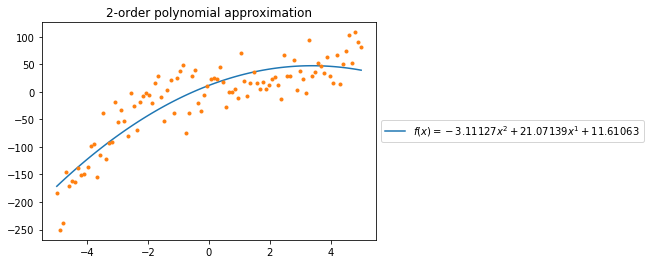

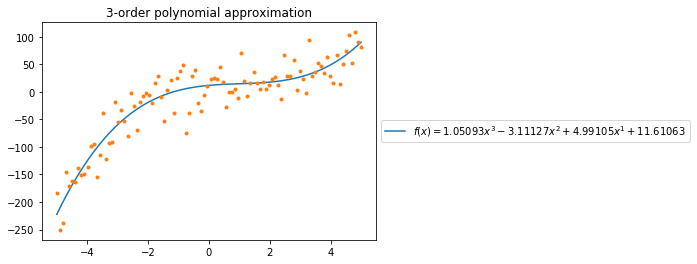

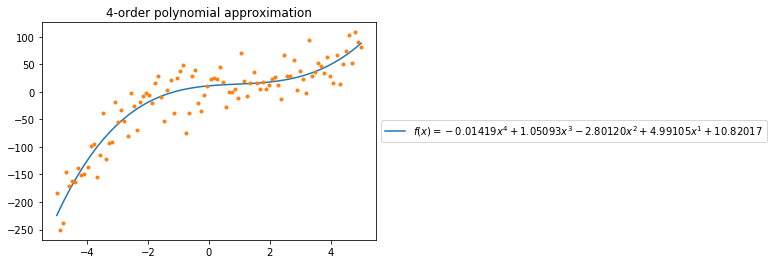

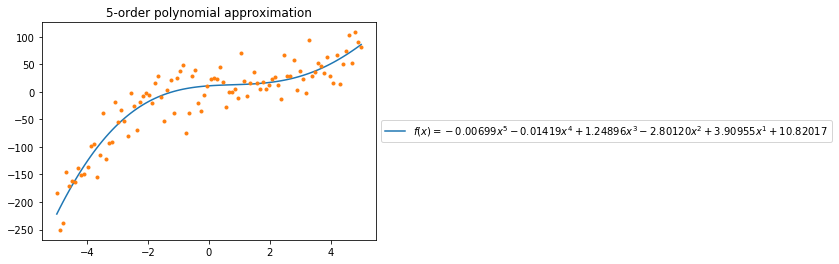

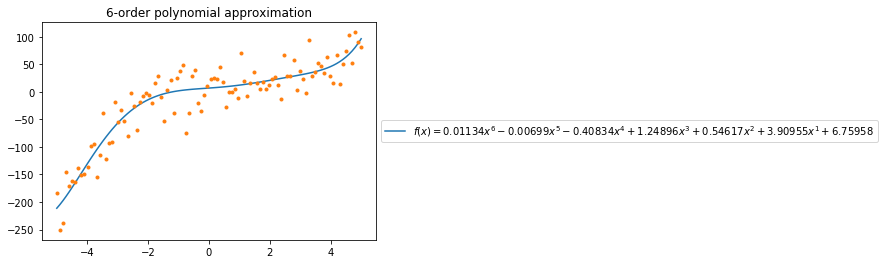

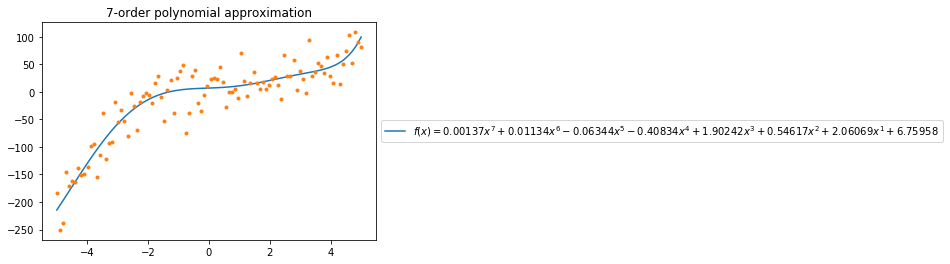

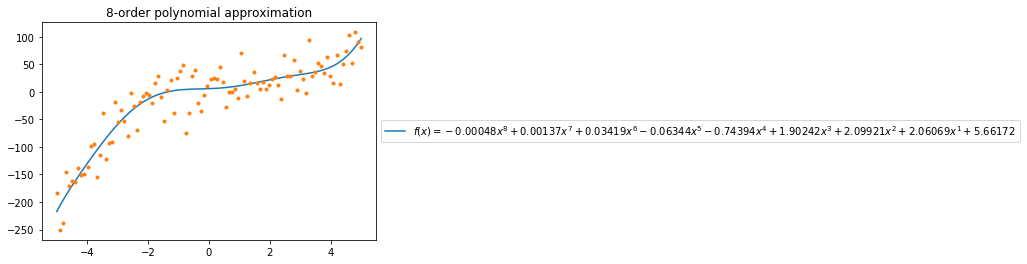

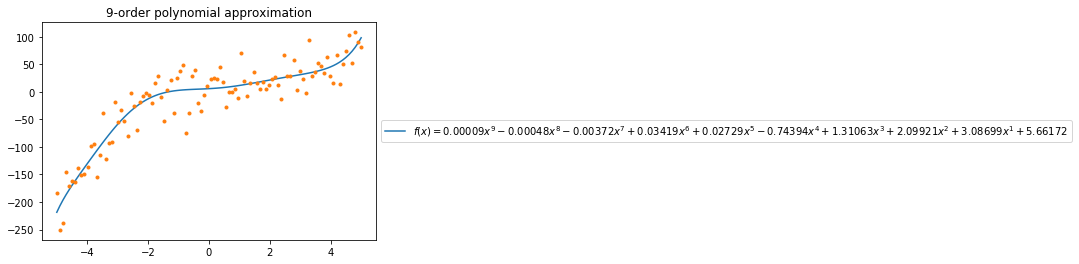

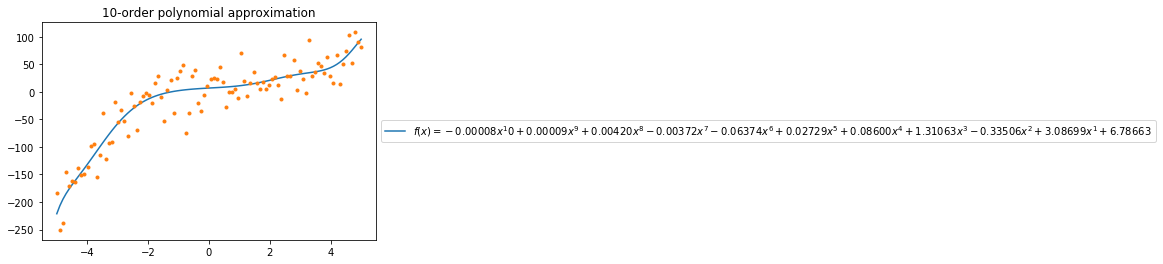

In [225]:
list_energy = []
for degree in range(1,11) :
    apxCoeff = np.polyfit(x,dp,degree)
    apxFuncVal = np.polyval(apxCoeff, x)
    list_energy.append(L2Distance(apxFuncVal,dp))
    apxFunc = np.poly1d(apxCoeff)
    plt.plot(x,apxFuncVal,label = generateFuncEquation(apxCoeff))
    title = str(degree) + '-order polynomial approximation'
    plt.title(title)
    plt.legend(loc='center left', bbox_to_anchor = (1,0.5))
    plt.plot(x,dp,'.')
    plt.show()

#### Energy for each degree

Text(0.5, 1.0, 'Energy for each degree')

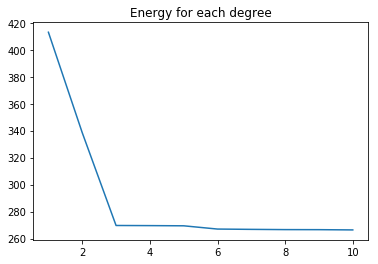

In [226]:
x = np.arange(1,11)
plt.plot(x,list_energy)
plt.title('Energy for each degree')